In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

data_path = 'data/team_stats_cleaned.csv'

try:
    df = pd.read_csv(data_path)
    print("data read successfully")
    print(df.head())
except FileNotFoundError:
    print("file could not be found")
    df = None

# quick overview of the data, ensure it's correct.
if df is not None:
    print("\n--- First 5 rows of the DataFrame ---")
    print(df.head())

    
    print("\n--- DataFrame Info ---")
    df.info()

data read successfully
   year               team  wins  losses  scoring_points_game  \
0  2016          Air Force    10       3                 35.2   
1  2016              Akron     5       7                 27.4   
2  2016            Alabama    14       1                 38.8   
3  2016  Appalachian State    10       3                 29.2   
4  2016            Arizona     3       9                 24.8   

   scoring_points_game_opp  total_offense_yards___play  \
0                     26.2                        6.02   
1                     33.6                        5.99   
2                     13.0                        6.47   
3                     17.8                        6.13   
4                     38.3                        6.08   

   total_offense_yards___play_opp  first_downs_total  first_downs_total_opp  \
0                            5.79                302                    229   
1                            6.05                234                    294   



--- Generating Plots ---


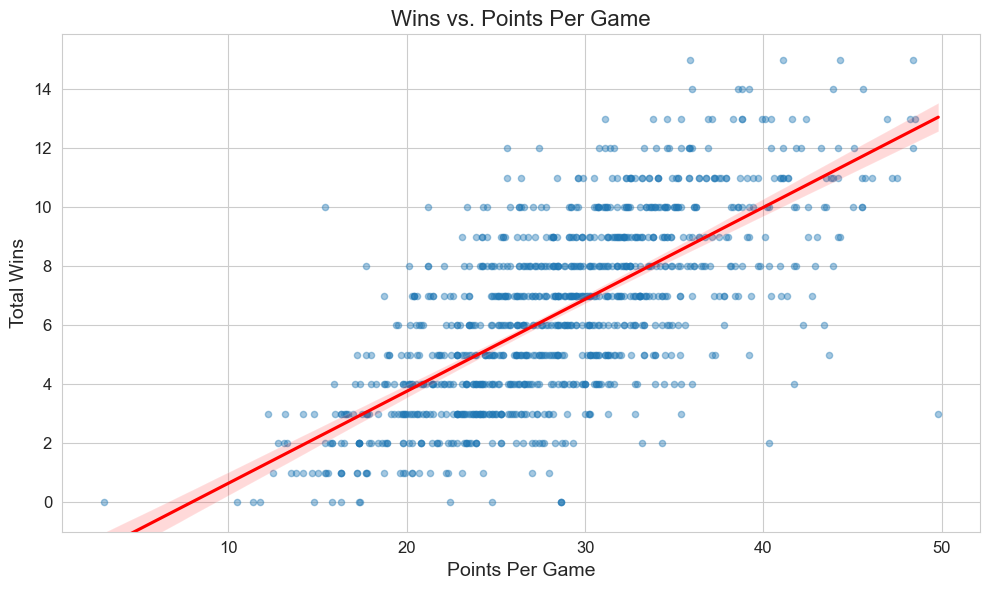

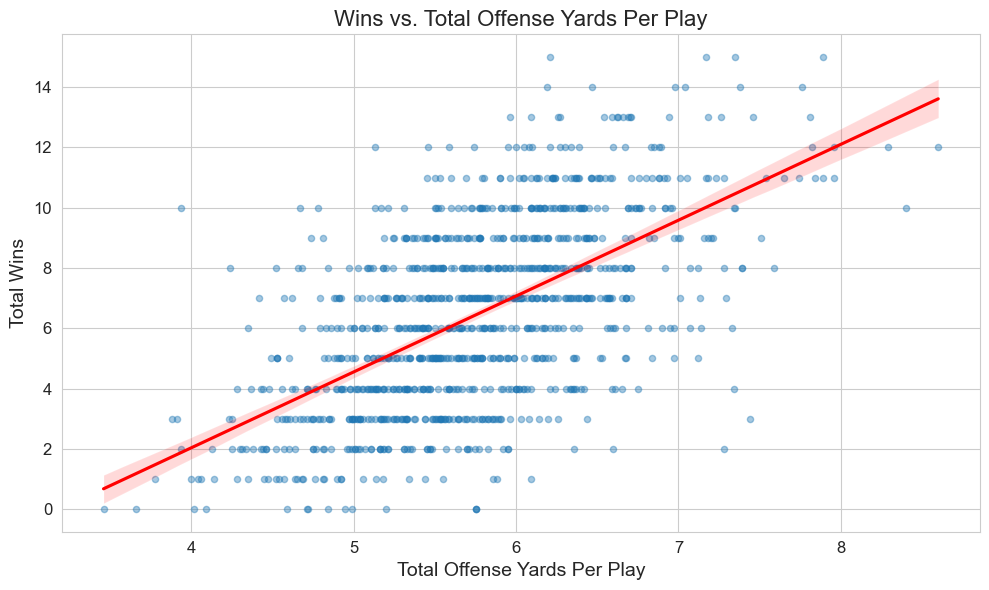

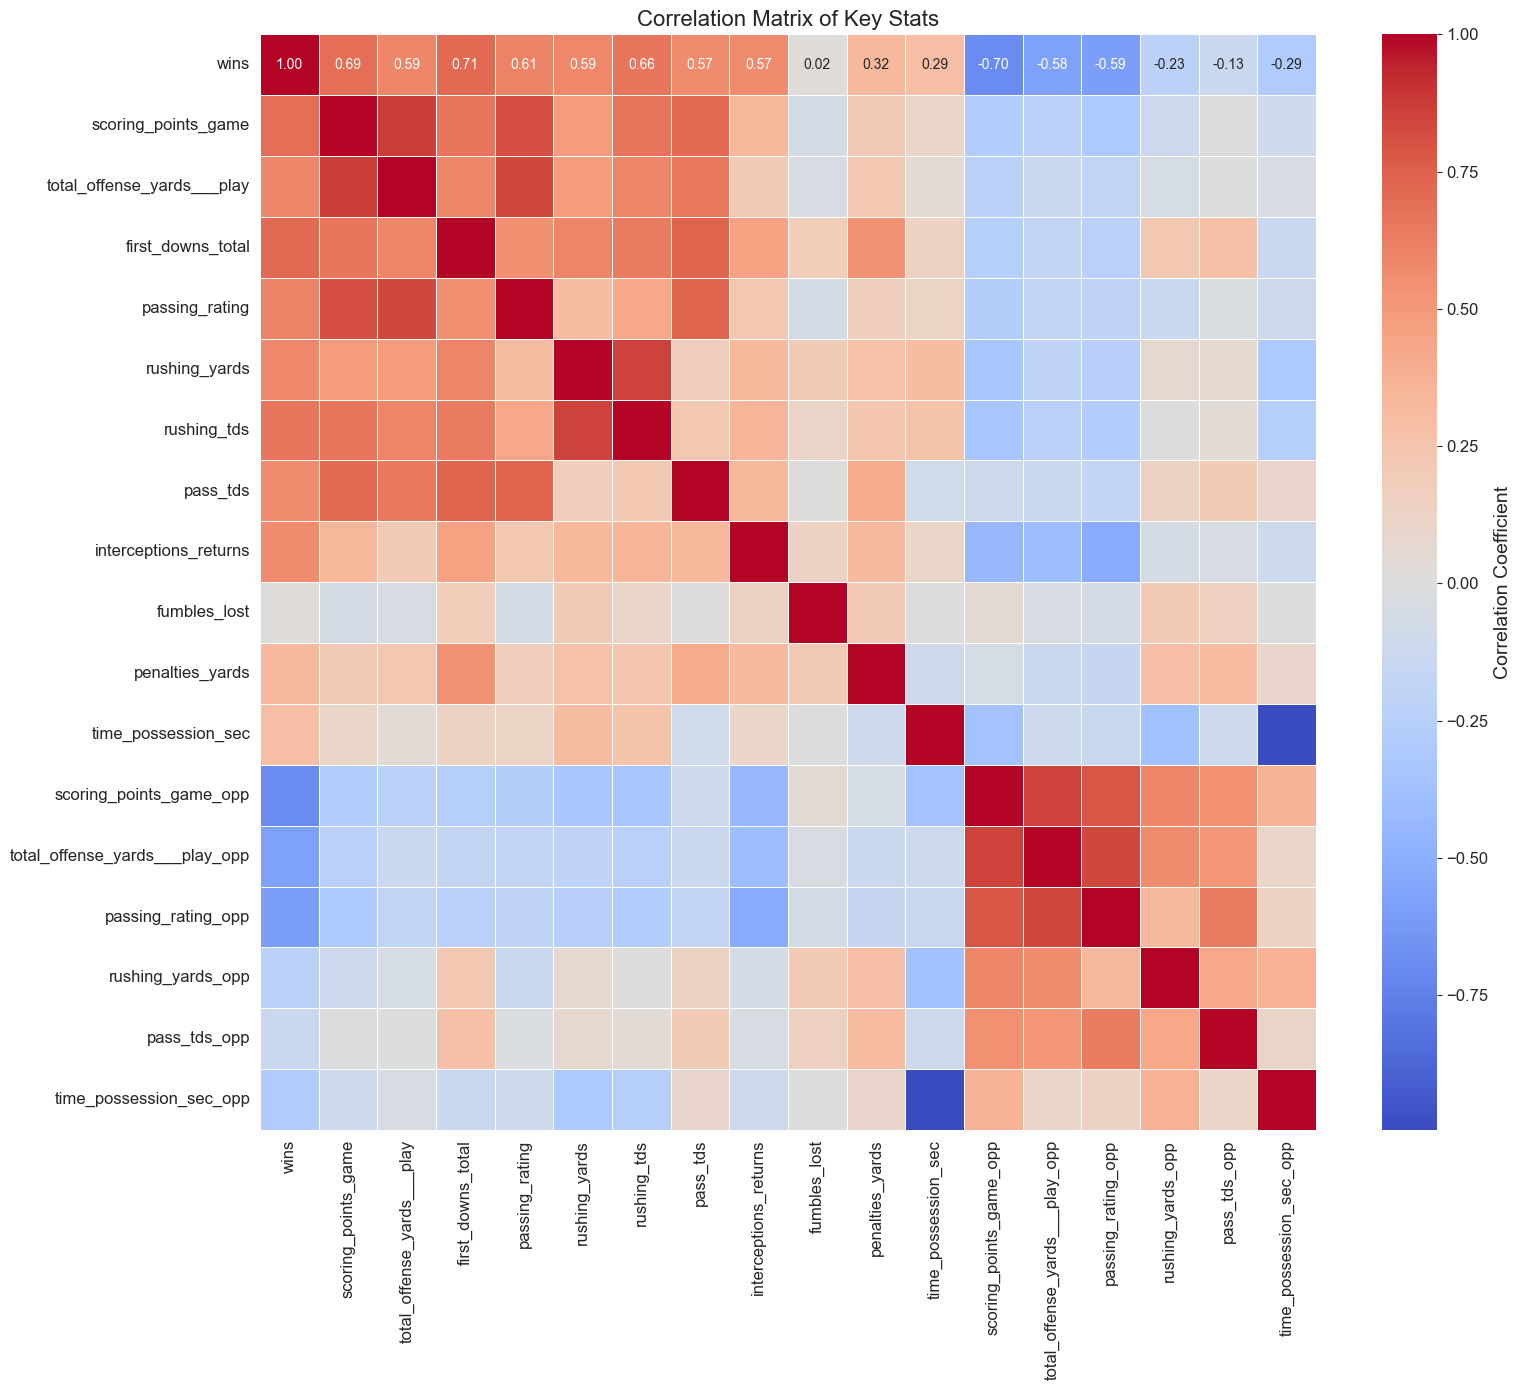

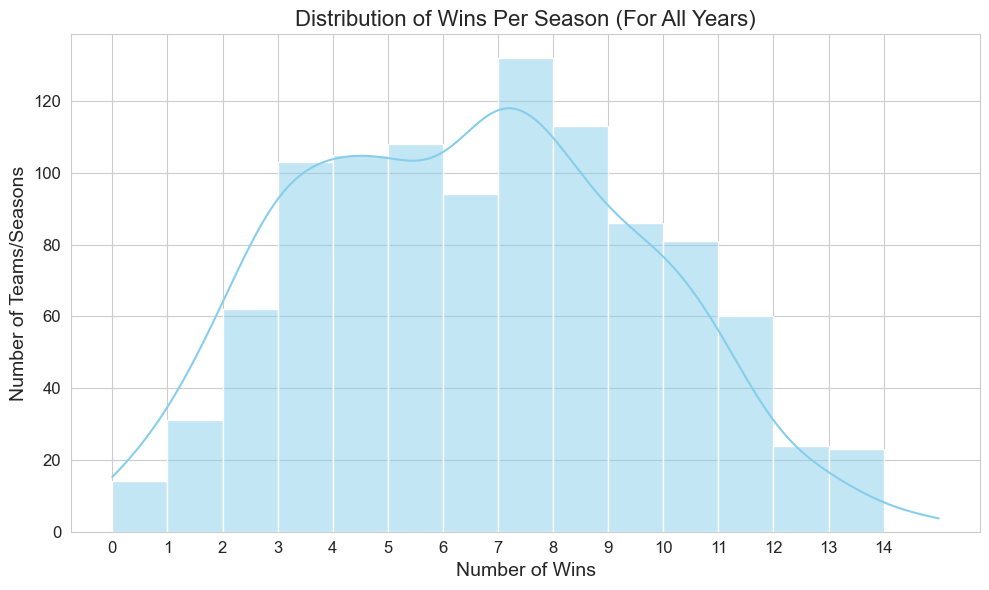

In [4]:
# plotting EDA
if df is not None:
    # make it look nice
    sb.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12

    print("\n--- Generating Plots ---")

    # 1. Wins vs. Points Per Game (w/ regression)
    plt.figure()
    sb.regplot(x='scoring_points_game', y='wins', data=df, scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
    plt.title('Wins vs. Points Per Game')
    plt.xlabel('Points Per Game')
    plt.ylabel('Total Wins')
    plt.ylim(bottom=-1)
    plt.tight_layout()
    plt.show()

    # 2. Wins vs. Total Offense Yards Per Play (w/ regression)
    plt.figure()
    sb.regplot(x='total_offense_yards___play', y='wins', data=df, scatter_kws={'alpha':0.4, 's':20}, line_kws={'color':'red'})
    plt.title('Wins vs. Total Offense Yards Per Play')
    plt.xlabel('Total Offense Yards Per Play')
    plt.ylabel('Total Wins')
    plt.tight_layout()
    plt.show()

    # 3. Correlation Matrix (w/ heatmap)
    # stats important to the exploratory analysis
    correlation_cols = [
        'wins', 'win_percentage', 'scoring_points_game', 'total_offense_yards___play',
        'first_downs_total', 'passing_rating', 'rushing_yards', 'rushing_tds',
        'pass_tds', 'interceptions_returns', 'fumbles_lost', 'penalties_yards',
        'redzone_efficiency', 'time_possession_sec', 'turnover_margin',
        'scoring_points_game_opp', 'total_offense_yards___play_opp',
        'passing_rating_opp', 'rushing_yards_opp', 'pass_tds_opp',
        'redzone_efficiency_opp', 'time_possession_sec_opp'
    ]

    # only use the numeric columns (all except team name)
    numeric_df_cols = df.select_dtypes(include=np.number).columns.tolist()
    existing_correlation_cols = [col for col in correlation_cols if col in numeric_df_cols]

    if existing_correlation_cols:
        plt.figure(figsize=(16, 14))
        corr_matrix = df[existing_correlation_cols].corr()
        sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Correlation Matrix of Key Stats')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough columns or columns don't exist.")


    # 4. Distribution of Wins Per Season
    plt.figure()
    sb.histplot(df['wins'], bins=range(0, 15), kde=True, color='skyblue')
    plt.title('Distribution of Wins Per Season (For All Years)')
    plt.xlabel('Number of Wins')
    plt.ylabel('Number of Teams/Seasons')
    plt.xticks(range(0, 15))
    plt.tight_layout()
    plt.show()

else:
    print("DataFrame not loaded.")